# Recognizing Handwritten Digits with scikit-learn

## Load Dataset

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

## Full description of the dataset

In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

The numerical values represented by images, i.e., the targets, are contained in the digit.targets array.

In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

## Shape of the dataset

In [4]:
digits.data.shape

(1797, 64)

## Images stored in the form of array

The images of the handwritten digits are contained in a digits,i.e.,images array.

Each element of this array is an image that is represented by an 8x8 matrix of numerical values that correspond to a grayscale from white, with a value of 0, to black, with the value 15

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

The images of the handwritten digits are contained in a digits.images array

## Visualizing Digit Array

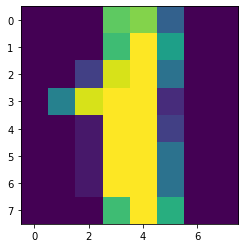

In [6]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[1])

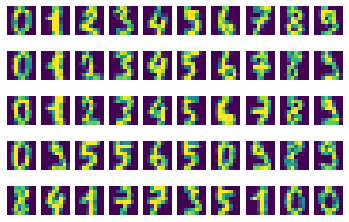

In [7]:
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(digits.images[i,:].reshape(8,8))
    plt.axis('off')

## Train Test Split

we found that shape of the dataset is  1,797 images. we can determine if that is true -

In [8]:
digits.data.shape # data containg x values

(1797, 64)

In [9]:
digits.target.shape #data containing y values

(1797,)

We will use the first 1791 digits for training our machine

We will use the last 6 digits for testing i.e. as validation set, so below is a visualization of this set.

Our values for testing are: [4, 9, 0, 8, 9, 8]

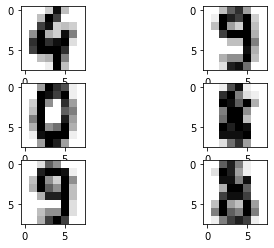

In [10]:
plt.subplot(321)
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[1792], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[1793], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[1794], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[1795], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.show()

## Now we are training our data on initial model

In [11]:
main_data=digits.data
targets=digits.target

# Case 1: 1791 Training set, and 6 Test values

## Importing Support Vector Machine (SVM) from scikit-learn

In [12]:
from sklearn import svm 
from sklearn.metrics import accuracy_score
svc = svm.SVC(gamma=0.00001,C=100.)

In [13]:
svc.fit(digits.data[0:1791],digits.target[0:1791])
prediction = svc.predict(main_data[1791:])

As we can see, all 6 values from above were predicted correctly

In [14]:
print("Predicted values: ", prediction)
print("Actual values: ", targets[1791:])
accuracy_svc = accuracy_score(targets[1791:] , prediction)*100
print("Accuracy is: ",accuracy_svc,"%")

Predicted values:  [4 9 0 8 9 8]
Actual values:  [4 9 0 8 9 8]
Accuracy is:  100.0 %


### Our accuracy for 1791:6 division is 100%

# Modified training of data

In [15]:
from sklearn.svm import SVC
svc = SVC()
SVC(C=100., cache_size=200,class_weight=None, coef0=0.0,degree=3,
   gamma=0.001, kernel='rbf',max_iter=-1,probability=False,
   random_state=None, shrinking=True, tol=0.001, verbose=False)
svc_m = svm.SVC(gamma=0.001 , C=100.)
modified_svc=svc_m.fit(main_data[0:1791], targets[0:1791])

In [16]:
pred_modified=modified_svc.predict(main_data[1791:])

In [17]:
print("Predicted values: ", pred_modified)
print("Actual values: ", targets[1791:])
print("Accuracy is: ",(accuracy_score(targets[1791:] , prediction)*100),"%")

Predicted values:  [4 9 0 8 9 8]
Actual values:  [4 9 0 8 9 8]
Accuracy is:  100.0 %


### Our accuracy for modified training is also 100%

# Case 2: 80% values for training (1438), and 20% values for testing (359)

In [18]:
svc.fit(main_data[0:1438], targets[0:1438])
prediction_case_2 = svc.predict(main_data[1438:])
acc_case_2 = accuracy_score(targets[1438:] , prediction_case_2)*100
print("Accuracy is: ", acc_case_2,"%")

Accuracy is:  94.15041782729804 %


### The accuracy for 80:20 division is 94.15 %

# Case 3: 75% values for training (1348), and 25% values for testing (449)

## Training of data

In [19]:
svc.fit(main_data[0:1347], targets[0:1347])
prediction_case_3 = svc.predict(main_data[1347:])
acc_case_3 = accuracy_score(targets[1347:] , prediction_case_3)*100
print("Accuracy is: ", acc_case_3,"%")

Accuracy is:  94.88888888888889 %


### The accuracy for 75:25 division is 94.88 %

# Case 4: 70% values for training(1258) and 30% values for testing (539)

In [20]:
svc.fit(main_data[0:1258], targets[0:1258])
prediction_case_4 = svc.predict(main_data[1258:])
acc_case_4 = accuracy_score(targets[1258:] , prediction_case_4)*100
print("Accuracy is: ", acc_case_4,"%")

Accuracy is:  95.36178107606679 %


### The accuracy for 70:30 division is 95.36 %

# Case 5: 65% values for training(1168) and 35% values for testing (629)

In [21]:
svc.fit(main_data[0:1168], targets[0:1168 ])
prediction_case_5 = svc.predict(main_data[1168:])
acc_case_5 = accuracy_score(targets[1168:] , prediction_case_5)*100
print("Accuracy is: ", acc_case_5,"%")

Accuracy is:  95.23052464228935 %


### The accuracy for 65:35 division is 95.23 %

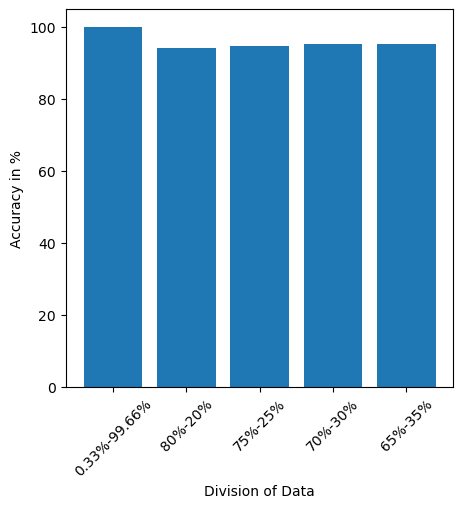

In [22]:
from matplotlib.pyplot import figure

figure(figsize=(5, 5), dpi=100)

ac_list = {"0.33%-99.66%":accuracy_svc,"80%-20%":acc_case_2,"75%-25%":acc_case_3,
           "70%-30%":acc_case_4,"65%-35%":acc_case_5}
names = list(ac_list.keys())
values = list(ac_list.values())
plt.bar(range(len(ac_list)), values, tick_label=names)
plt.xticks(rotation = 45)
plt.xlabel("Division of Data")
plt.ylabel("Accuracy in %")
plt.show()

# Case 6: Extrenal data source :mnist data

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
mnist=pd.read_csv("D:\data set\MNIST_Train (2).csv")

In [25]:
mnist.shape

(42000, 785)

In [26]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


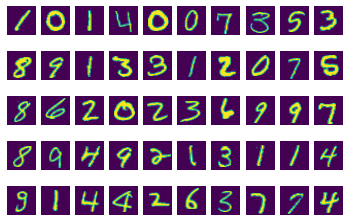

In [27]:
mnist1=mnist.iloc[:,1:]
mnist1=np.array(mnist1)
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(mnist1[i,:].reshape(28,28))
    plt.axis('off')

In [33]:
mnist_x=mnist.iloc[:,1:]
mnist_y=mnist.iloc[:,0]

In [34]:
mnist_x=np.array(mnist_x)
mnist_y=np.array(mnist_y)

In [36]:
mnist_y[0]

1

In [37]:
svc.fit(mnist_x, mnist_y)

SVC()

In [38]:
prediction_case_6 = svc.predict(mnist_x)
acc_case_6 = accuracy_score(mnist_y , prediction_case_6)*100
print("Accuracy is: ", acc_case_6,"%")

Accuracy is:  98.91428571428571 %
